### Research Question 2: What is the number of death and death rates by COVID-19 vaccination status (fully vaccinated, partially vaccinated, unvaccinated and boosted populations)? 

In [97]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
# Load the data files from Github
population_data_path = 'https://raw.githubusercontent.com/khoocheeshin/HIAGroupProject/refs/heads/main/GenderPopulationByYear.csv'
deaths_data_path = 'https://raw.githubusercontent.com/khoocheeshin/HIAGroupProject/refs/heads/main/deaths_malaysia.csv'

population_data = pd.read_csv(population_data_path)
deaths_data = pd.read_csv(deaths_data_path)

In [99]:
# Display the first few rows of population dataset to understand their structure
population_data.head()

,year,total_pop,pop_male,pop_female
0,2021,32576300,17000500,15575800
1,2022,32698100,17039800,15658300
2,2023,33401800,17472300,15929500
3,2024,34058800,17882700,16176100


In [100]:
# Display the first few rows of death dataset to understand their structure
deaths_data.head()

,date,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
0,2020-03-17,2,0,2,0,2,0,0,0,0
1,2020-03-18,0,0,0,0,0,0,0,0,0
2,2020-03-19,0,0,0,0,0,0,0,0,0
3,2020-03-20,1,0,1,0,1,0,0,0,0
4,2020-03-21,4,0,4,0,4,0,0,0,0


In [101]:
# to view the dataframe: number of rows, number of columns, column names, non null counts and data types
population_data.info()
deaths_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        4 non-null      int64
 1   total_pop   4 non-null      int64
 2   pop_male    4 non-null      int64
 3   pop_female  4 non-null      int64
dtypes: int64(4)
memory usage: 260.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1720 non-null   object
 1   deaths_new      1720 non-null   int64 
 2   deaths_bid      1720 non-null   int64 
 3   deaths_new_dod  1720 non-null   int64 
 4   deaths_bid_dod  1720 non-null   int64 
 5   deaths_unvax    1720 non-null   int64 
 6   deaths_pvax     1720 non-null   int64 
 7   deaths_fvax     1720 non-null   int64 
 8   deaths_boost    1720 non-null   int64 
 9   deaths_tat      1720 non-nu

In [102]:
# Convert the 'date' column to datetime format and filter the relevant date range
deaths_data['date'] = pd.to_datetime(deaths_data['date'])
filtered_deaths_data = deaths_data[
    (deaths_data['date'] >= '2021-04-01') & (deaths_data['date'] <= '2024-11-30')
]

null_counts = filtered_deaths_data.isnull().sum()
print("Number of missing values in each column:\n", null_counts)

# Aggregate total deaths for each vaccination group. Create a data frame with two columns:
# index: The vaccination statuses (deaths_unvax, deaths_pvax, deaths_fvax, deaths_boost).
# Total Deaths: The total number of deaths for each vaccination status.

total_deaths_by_vax_status = filtered_deaths_data[
    ['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']
].sum().reset_index()

total_deaths_by_vax_status.columns = ['Vaccination Status', 'Total Deaths']

# Proceed with visualization
total_deaths_by_vax_status


Number of missing values in each column:
 date              0
deaths_new        0
deaths_bid        0
deaths_new_dod    0
deaths_bid_dod    0
deaths_unvax      0
deaths_pvax       0
deaths_fvax       0
deaths_boost      0
deaths_tat        0
dtype: int64


,Vaccination Status,Total Deaths
0,deaths_unvax,21183
1,deaths_pvax,6314
2,deaths_fvax,7000
3,deaths_boost,1497


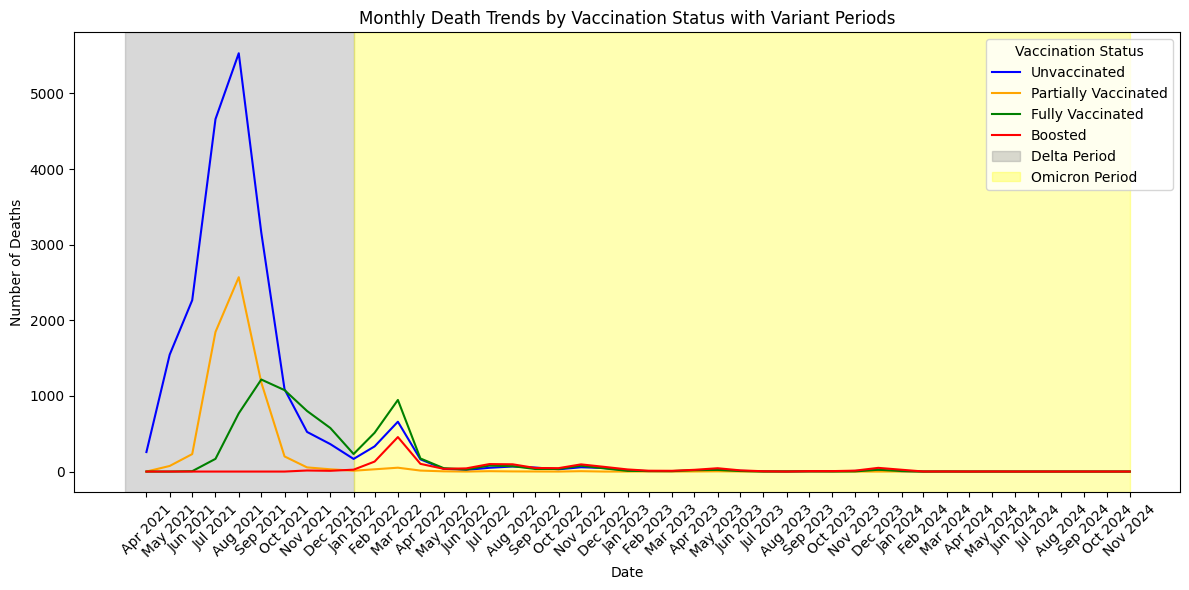

In [103]:
# Define periods for Delta and Omicron variants
delta_period = ('2021-04-01', '2022-01-31')
omicron_period = ('2022-02-01', '2024-11-30')

# Convert to datetime for plotting
delta_start, delta_end = pd.to_datetime(delta_period)
omicron_start, omicron_end = pd.to_datetime(omicron_period)

# Aggregate deaths by month and vaccination status for trend visualization
deaths_by_month = filtered_deaths_data.resample('ME', on='date')[
    ['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']
].sum()

# Plot trends with shaded periods
plt.figure(figsize=(12, 6))
plt.plot(deaths_by_month.index, deaths_by_month['deaths_unvax'], label='Unvaccinated', color='blue')
plt.plot(deaths_by_month.index, deaths_by_month['deaths_pvax'], label='Partially Vaccinated', color='orange')
plt.plot(deaths_by_month.index, deaths_by_month['deaths_fvax'], label='Fully Vaccinated', color='green')
plt.plot(deaths_by_month.index, deaths_by_month['deaths_boost'], label='Boosted', color='red')

# Add shaded regions for Delta and Omicron periods
plt.axvspan(delta_start, delta_end, color='gray', alpha=0.3, label='Delta Period')
plt.axvspan(omicron_start, omicron_end, color='yellow', alpha=0.3, label='Omicron Period')

# Set x-axis ticks to show every month
plt.xticks(deaths_by_month.index, deaths_by_month.index.strftime('%b %Y'), rotation=45)

# Final plot adjustments
plt.title('Monthly Death Trends by Vaccination Status with Variant Periods')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend(title='Vaccination Status')
plt.tight_layout()
plt.show()


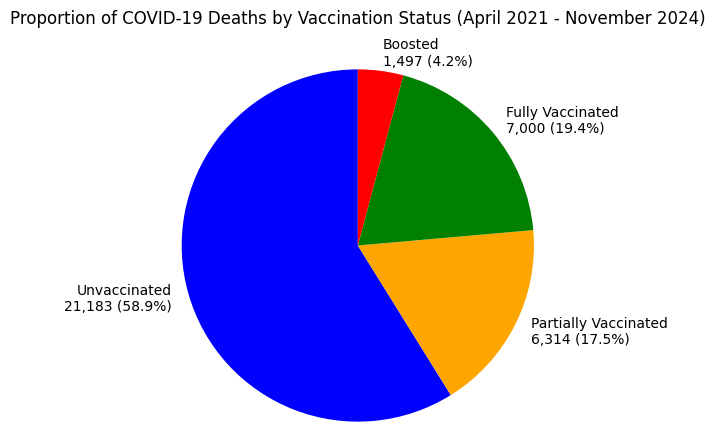

In [104]:
# Aggregate total deaths by vaccination status
total_deaths = filtered_deaths_data[
    ['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']
].sum()

# Calculate percentages for the pie chart
total_deaths_percent = (total_deaths / total_deaths.sum()) * 100

# Prepare data for the pie chart
labels = ['Unvaccinated', 'Partially Vaccinated', 'Fully Vaccinated', 'Boosted']
sizes = total_deaths.values
percentages = total_deaths_percent.values

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=[f"{label}\n{int(size):,} ({percent:.1f}%)" for label, size, percent in zip(labels, sizes, percentages)],
    startangle=90,
    colors=['blue', 'orange', 'green', 'red']
)
plt.title('Proportion of COVID-19 Deaths by Vaccination Status (April 2021 - November 2024)\n')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()



In [106]:
# Extract year from the date for annual grouping
filtered_deaths_data = filtered_deaths_data.copy()
filtered_deaths_data['year'] = filtered_deaths_data['date'].dt.year

filtered_population_data = population_data[['year', 'total_pop']]

# Calculate annual deaths by vaccination status
annual_deaths = filtered_deaths_data.groupby('year')[
    ['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']
].sum().reset_index()

# Merge deaths data with population data
death_rates = pd.merge(annual_deaths, filtered_population_data, on='year')

# Calculate annual death rates per 100,000 population by vaccination status
for col in ['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']:
    death_rates[f'rate_{col}'] = (death_rates[col] / death_rates['total_pop']) * 100000

# Prepare data for visualization
death_rates.head()


,year,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,total_pop,rate_deaths_unvax,rate_deaths_pvax,rate_deaths_fvax,rate_deaths_boost
0,2021,19400,6185,4614,24,32576300,59.552497,18.986195,14.163671,0.073673
1,2022,1682,121,2274,1237,32698100,5.144030,0.370052,6.954533,3.783094
2,2023,96,7,104,209,33401800,0.287410,0.020957,0.311360,0.625715
3,2024,5,1,8,27,34058800,0.014680,0.002936,0.023489,0.079275


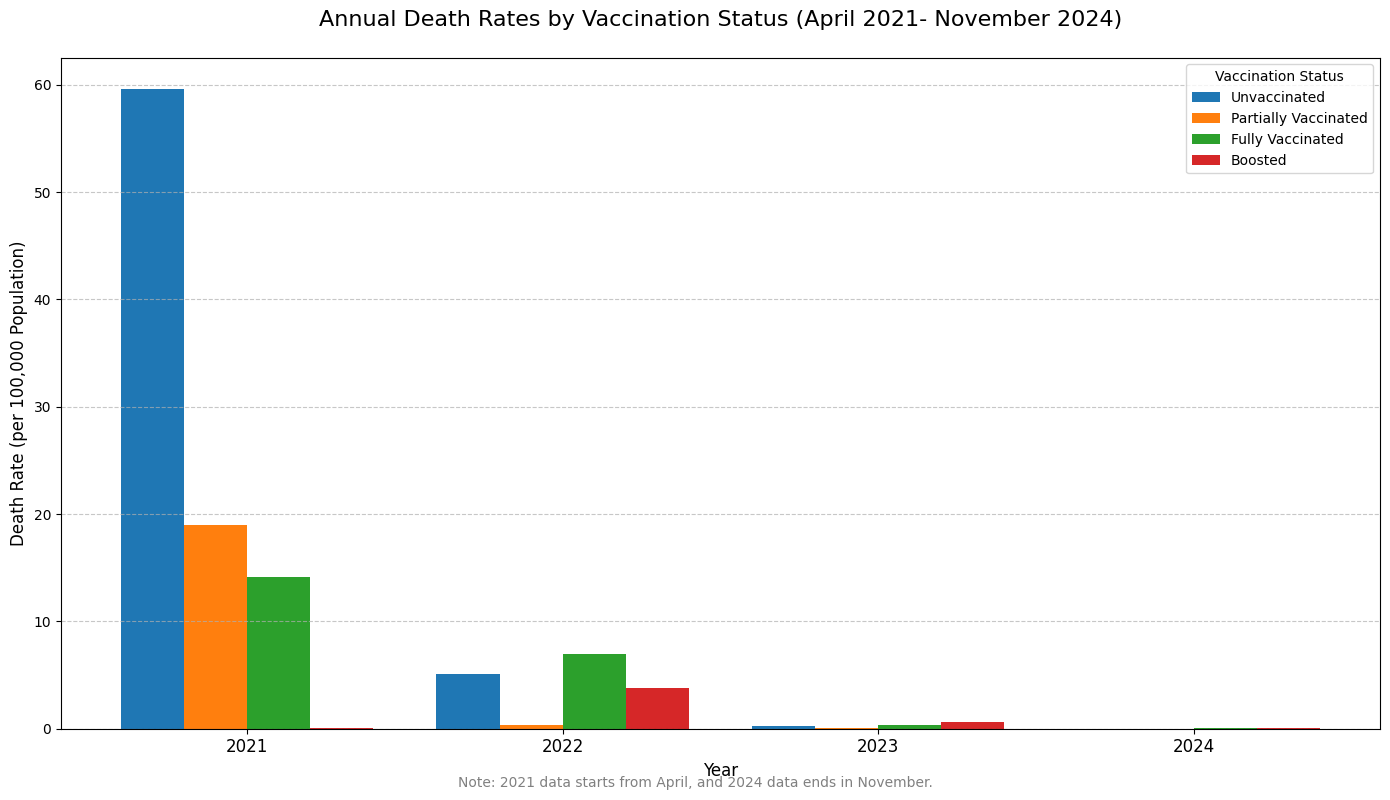

In [107]:
# Update the bar graph to include a note in the title about partial years for 2021 and 2024
categories = ['rate_deaths_unvax', 'rate_deaths_pvax', 'rate_deaths_fvax', 'rate_deaths_boost']
labels = ['Unvaccinated', 'Partially Vaccinated', 'Fully Vaccinated', 'Boosted']

x = np.arange(len(death_rates['year']))
bar_width = 0.2

plt.figure(figsize=(14, 8))

# Plot bars for each category
for i, (category, label) in enumerate(zip(categories, labels)):
    plt.bar(x + i * bar_width, death_rates[category], width=bar_width, label=label)

# Customize the chart
plt.title("Annual Death Rates by Vaccination Status (April 2021- November 2024)\n", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Death Rate (per 100,000 Population)", fontsize=12)
plt.xticks(x + bar_width * 1.5, death_rates['year'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Vaccination Status", fontsize=10)

# Add a note below the graph
plt.figtext(0.5, 0.01, "\nNote: 2021 data starts from April, and 2024 data ends in November.", 
            ha='center', fontsize=10, color='gray')

plt.tight_layout()
plt.show()


In [108]:
# Extract month and year for grouping
filtered_deaths_data.loc[:, 'month_year'] = filtered_deaths_data['date'].dt.to_period('M')

# Calculate monthly deaths by vaccination status
monthly_deaths = filtered_deaths_data.groupby('month_year')[
    ['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']
].sum().reset_index()

# Convert month_year to a datetime object for merging
monthly_deaths['month_year'] = monthly_deaths['month_year'].dt.to_timestamp()

# Repeat population data for each month
population_monthly = population_data.loc[population_data.index.repeat(12)].reset_index(drop=True)
population_monthly['month_year'] = pd.date_range(start='2021-01-01', end='2024-12-01', freq='MS')[:len(population_monthly)]

# Merge monthly deaths with population data
monthly_data = pd.merge(monthly_deaths, population_monthly, on='month_year', how='left')

# Calculate death rates per 100,000 population for each vaccination status
for col in ['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']:
    monthly_data[f'rate_{col}'] = (monthly_data[col] / monthly_data['total_pop']) * 100000

# Filter data for the specified date range (April 2021 - November 2024)
monthly_data_filtered = monthly_data[
    (monthly_data['month_year'] >= '2021-04-01') & (monthly_data['month_year'] <= '2024-11-30')
]

# Prepare visualization
monthly_data_filtered.head()


,month_year,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,year,total_pop,pop_male,pop_female,rate_deaths_unvax,rate_deaths_pvax,rate_deaths_fvax,rate_deaths_boost
0,2021-04-01,258,0,0,0,2021,32576300,17000500,15575800,0.791987,0.000000,0.000000,0.0
1,2021-05-01,1546,74,0,0,2021,32576300,17000500,15575800,4.745781,0.227159,0.000000,0.0
2,2021-06-01,2266,231,5,0,2021,32576300,17000500,15575800,6.955977,0.709104,0.015349,0.0
3,2021-07-01,4661,1846,168,0,2021,32576300,17000500,15575800,14.307948,5.666696,0.515712,0.0
4,2021-08-01,5532,2570,770,0,2021,32576300,17000500,15575800,16.981671,7.889171,2.363682,0.0


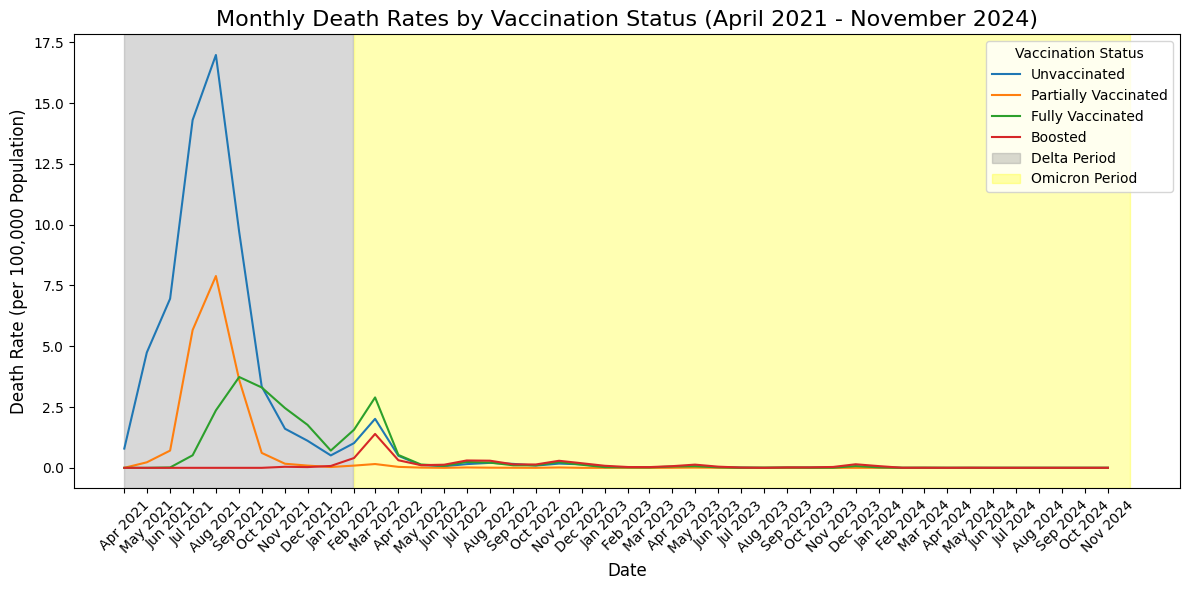

In [109]:
# Define categories and labels for visualization
categories = ['rate_deaths_unvax', 'rate_deaths_pvax', 'rate_deaths_fvax', 'rate_deaths_boost']
labels = ['Unvaccinated', 'Partially Vaccinated', 'Fully Vaccinated', 'Boosted']

# Plot monthly death rates for each vaccination status
plt.figure(figsize=(12, 6))

for category, label in zip(categories, labels):
    plt.plot(monthly_data_filtered['month_year'], monthly_data_filtered[category], label=label, linestyle='-')

# Add shaded regions for Delta and Omicron periods
plt.axvspan(delta_start, delta_end, color='gray', alpha=0.3, label='Delta Period')
plt.axvspan(omicron_start, omicron_end, color='yellow', alpha=0.3, label='Omicron Period')

plt.xticks(
    ticks=monthly_data_filtered['month_year'],
    labels=[date.strftime('%b %Y') for date in monthly_data_filtered['month_year']],
    rotation=45
)

# Customize the chart
plt.title("Monthly Death Rates by Vaccination Status (April 2021 - November 2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Death Rate (per 100,000 Population)", fontsize=12)
plt.legend(title="Vaccination Status", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
